In [4]:
# Standard libraries
import json
import itertools
import warnings
warnings.simplefilter(action='ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm, ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score # Import relevant metrics

import xgboost as xgb

import shap

# Domain-specific libraries (if applicable, keep separate)
import mygene

In [5]:
df = pd.read_csv("/Users/knu_cgl1/Desktop/Gene data/Metastsis data/Metastsis_count.csv")
df.index = df["Unnamed: 0"]
df = df.drop("Unnamed: 0", axis=1)
df

,SRR10003688,SRR10003701,SRR10003714,SRR10003789,SRR10003818,SRR10003825,SRR10003832,SRR10003838,SRR10003851,SRR10003855,...,SRR17262725,SRR17262727,SRR17262728,SRR17262730,SRR19732844,SRR19732846,SRR19732847,SRR19732849,SRR19732850,SRR19732852
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.634591,3.861372,2.369932,-0.024265,3.037411,2.919402,2.377987,-0.024265,2.168575,-0.024265,...,3.300537,2.928413,5.002978,2.598011,4.122754,0.606221,4.269963,-0.060935,3.747578,0.854084
TNMD,0.132629,0.806335,1.547324,-0.003452,0.758335,0.843711,-0.003452,-0.003452,0.361491,-0.003452,...,3.135697,0.099653,0.099653,0.099653,1.782258,0.099653,0.966633,0.099653,1.993467,0.099653
DPM1,4.325659,4.994944,5.373903,0.040342,5.489552,5.530401,4.048836,0.040342,4.797768,0.040342,...,2.636758,3.115968,0.423205,4.539436,4.143478,3.402546,4.422577,1.910259,5.006067,2.031044
SCYL3,3.271129,2.765134,2.134989,-0.266871,3.211425,2.523350,2.546148,-0.266871,3.380146,-0.266871,...,4.244526,4.097938,3.584476,3.997066,1.708107,1.734147,2.513969,0.887502,2.021550,0.163173
FIRRM,3.272960,3.504244,4.099227,-0.116630,3.611678,3.665225,3.200871,-0.116630,3.619338,-0.116630,...,4.815363,2.289768,4.545045,1.360394,2.501322,2.670901,3.656313,0.736387,3.110104,0.285229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC124903386,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,...,0.018899,0.018899,0.018899,0.018899,0.018899,0.539301,0.018899,0.018899,0.018899,0.018899
ZNF75CP,0.496960,0.514451,0.738695,-0.139090,0.236383,0.470304,0.114428,-0.139090,0.043105,-0.139090,...,2.927312,3.059079,3.187197,2.378335,1.893815,0.681358,1.881052,0.322162,1.291829,0.245237
ANKRD33BP3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df_T = df.T.reset_index()
df_T = df_T.rename(columns={'index':'SRRID'})
df_T = df_T.loc[:, (df_T != 0).any(axis=0)]
df_T

Unnamed: 0,SRRID,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,...,LOC105372749,LOC105370117,LOC101928045,FAM106C,ZNF73P,LOC124903386,ZNF75CP,ANKRD33BP3,LOC100419917,SMIM42
0,SRR10003688,2.634591,0.132629,4.325659,3.271129,3.272960,0.376369,3.644252,3.051085,3.953366,...,0.0,0.005898,-0.012306,0.693659,0.110473,0.013108,0.496960,0.0,0.0,0.005365
1,SRR10003701,3.861372,0.806335,4.994944,2.765134,3.504244,1.589392,4.840564,3.736008,4.939723,...,0.0,0.005898,-0.012306,-0.102911,0.110473,0.013108,0.514451,0.0,0.0,0.005365
2,SRR10003714,2.369932,1.547324,5.373903,2.134989,4.099227,2.042332,6.053191,3.588188,5.227132,...,0.0,0.023598,0.058957,-0.102911,0.110473,0.013108,0.738695,0.0,0.0,0.005365
3,SRR10003789,-0.024265,-0.003452,0.040342,-0.266871,-0.116630,-0.110837,-0.579631,-0.007781,-0.470290,...,0.0,0.005898,-0.012306,-0.102911,-0.024339,0.013108,-0.139090,0.0,0.0,0.005365
4,SRR10003818,3.037411,0.758335,5.489552,3.211425,3.611678,2.185630,5.811390,3.397065,5.673002,...,0.0,0.005898,-0.012306,0.002323,0.061126,0.013108,0.236383,0.0,0.0,0.005365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,SRR19732846,0.606221,0.099653,3.402546,1.734147,2.670901,1.837354,3.426485,2.991061,4.453082,...,0.0,-0.007686,0.053203,0.226638,0.036639,0.539301,0.681358,0.0,0.0,0.004541
1147,SRR19732847,4.269963,0.966633,4.422577,2.513969,3.656313,1.587982,5.231459,3.632744,4.738058,...,0.0,-0.007686,0.463389,0.761614,0.036639,0.018899,1.881052,0.0,0.0,0.004541
1148,SRR19732849,-0.060935,0.099653,1.910259,0.887502,0.736387,2.116241,1.042089,1.161876,3.062960,...,0.0,-0.007686,0.053203,0.350313,0.036639,0.018899,0.322162,0.0,0.0,0.004541
1149,SRR19732850,3.747578,1.993467,5.006067,2.021550,3.110104,0.391564,6.183548,3.597175,2.898243,...,0.0,-0.007686,0.053203,0.226638,0.036639,0.018899,1.291829,0.0,0.0,0.004541


In [7]:
pheno_df = pd.read_csv("/Users/knu_cgl1/Desktop/Gene data/Metastsis data/Metastsis_pheno.csv")
pheno_df = pheno_df.drop("Unnamed: 0", axis=1)
pheno_df

,Cancer,ProjectID,dbgap/SRPID,Access,SRRID,GroupID,Primary Or Metastasis,Tissue
0,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003688,Breast,Primary,Breast
1,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003701,Breast,Primary,Breast
2,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003714,Breast,Primary,Breast
3,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003789,Breast,Primary,Breast (from https://portal.gdc.cancer.gov/pro...
4,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003818,Breast,Primary,Breast (from https://portal.gdc.cancer.gov/pro...
...,...,...,...,...,...,...,...,...
1146,STAD,PRJNA850175,SRP382235,public,SRR19732846,Stomach,Primary,Stomach
1147,STAD,PRJNA850175,SRP382235,public,SRR19732847,Ovary,Metastasis,Ovary
1148,STAD,PRJNA850175,SRP382235,public,SRR19732849,Stomach,Primary,Stomach
1149,STAD,PRJNA850175,SRP382235,public,SRR19732850,Ovary,Metastasis,Ovary


In [8]:
pheno_df[["SRRID","Primary Or Metastasis"]]

,SRRID,Primary Or Metastasis
0,SRR10003688,Primary
1,SRR10003701,Primary
2,SRR10003714,Primary
3,SRR10003789,Primary
4,SRR10003818,Primary
...,...,...
1146,SRR19732846,Primary
1147,SRR19732847,Metastasis
1148,SRR19732849,Primary
1149,SRR19732850,Metastasis


In [9]:
ml_df = pd.merge(df_T, pheno_df[["SRRID","Primary Or Metastasis"]], on="SRRID", how="left")
ml_df

,SRRID,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,...,LOC105370117,LOC101928045,FAM106C,ZNF73P,LOC124903386,ZNF75CP,ANKRD33BP3,LOC100419917,SMIM42,Primary Or Metastasis
0,SRR10003688,2.634591,0.132629,4.325659,3.271129,3.272960,0.376369,3.644252,3.051085,3.953366,...,0.005898,-0.012306,0.693659,0.110473,0.013108,0.496960,0.0,0.0,0.005365,Primary
1,SRR10003701,3.861372,0.806335,4.994944,2.765134,3.504244,1.589392,4.840564,3.736008,4.939723,...,0.005898,-0.012306,-0.102911,0.110473,0.013108,0.514451,0.0,0.0,0.005365,Primary
2,SRR10003714,2.369932,1.547324,5.373903,2.134989,4.099227,2.042332,6.053191,3.588188,5.227132,...,0.023598,0.058957,-0.102911,0.110473,0.013108,0.738695,0.0,0.0,0.005365,Primary
3,SRR10003789,-0.024265,-0.003452,0.040342,-0.266871,-0.116630,-0.110837,-0.579631,-0.007781,-0.470290,...,0.005898,-0.012306,-0.102911,-0.024339,0.013108,-0.139090,0.0,0.0,0.005365,Primary
4,SRR10003818,3.037411,0.758335,5.489552,3.211425,3.611678,2.185630,5.811390,3.397065,5.673002,...,0.005898,-0.012306,0.002323,0.061126,0.013108,0.236383,0.0,0.0,0.005365,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,SRR19732846,0.606221,0.099653,3.402546,1.734147,2.670901,1.837354,3.426485,2.991061,4.453082,...,-0.007686,0.053203,0.226638,0.036639,0.539301,0.681358,0.0,0.0,0.004541,Primary
1147,SRR19732847,4.269963,0.966633,4.422577,2.513969,3.656313,1.587982,5.231459,3.632744,4.738058,...,-0.007686,0.463389,0.761614,0.036639,0.018899,1.881052,0.0,0.0,0.004541,Metastasis
1148,SRR19732849,-0.060935,0.099653,1.910259,0.887502,0.736387,2.116241,1.042089,1.161876,3.062960,...,-0.007686,0.053203,0.350313,0.036639,0.018899,0.322162,0.0,0.0,0.004541,Primary
1149,SRR19732850,3.747578,1.993467,5.006067,2.021550,3.110104,0.391564,6.183548,3.597175,2.898243,...,-0.007686,0.053203,0.226638,0.036639,0.018899,1.291829,0.0,0.0,0.004541,Metastasis


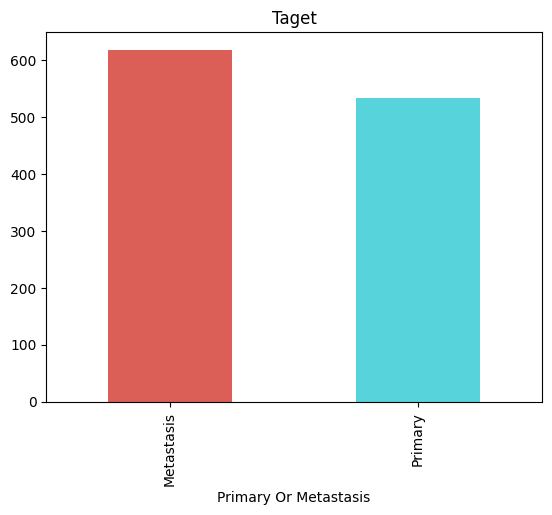

In [ ]:
plt.title('Taget')
colors = sns.color_palette('hls',2)
ml_df['Primary Or Metastasis'].value_counts().plot(kind= 'bar',color=colors)
plt.show()

In [ ]:
Y = ml_df['Primary Or Metastasis']
X = ml_df.drop(columns=['Primary Or Metastasis','SRRID'], axis=1)
print(Y.shape)
print(X.shape)

(1151,)
(1151, 44177)


In [19]:
from category_encoders import OrdinalEncoder, OneHotEncoder
encoder = OrdinalEncoder()
oneencoder = OneHotEncoder()
Y_ONE = oneencoder.fit_transform(Y)
Y_ONE

,Primary Or Metastasis_1,Primary Or Metastasis_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1146,1,0
1147,0,1
1148,1,0
1149,0,1


In [22]:
Y.value_counts()

Primary Or Metastasis
Metastasis    618
Primary       533
Name: count, dtype: int64

In [21]:
Y_ONE['Primary Or Metastasis_1'].value_counts()

Primary Or Metastasis_1
0    618
1    533
Name: count, dtype: int64

In [24]:
y_taget = Y_ONE['Primary Or Metastasis_1']

In [25]:
# 첫 번째 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_taget, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_taget
)

# 두 번째 split (검증셋 만들 때)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)
print("Train data :", X_train.shape, y_train.shape)
print("Val data :",X_val.shape, y_val.shape)
print("test data :", X_test.shape, y_test.shape)

Train data : (736, 44177) (736,)
Val data : (184, 44177) (184,)
test data : (231, 44177) (231,)
